In [33]:
# heatmaps for separate buildings scenario_2

import pandas as pd
import folium
from folium.plugins import HeatMap
import branca.colormap
from collections import defaultdict
import io
from PIL import Image
from IPython.display import Image
import matplotlib.pyplot as plt



hmap = folium.Map(location=[40.607421, 22.957578], zoom_start=13)

path = 'D:/Ακαδημαϊκά/Papers/International Journal of Environment and Pollution/Αποτελέσματα/scenario_2.2.xlsx'

for_map = pd.read_excel(path)

print(
    'Selection of buildings:\nManagement building = 1\nArchitecture = 2\nBuilding D = 3\nFaculty of Education = 4'
    '\nTheology = 5\nHydraulics Building = 6\nΕ13 Building = 7\nUniversity Gym = 8\nUniversity Student Club = 9')

building = int(input("Bulding selection (1-9): "))

print('Fuel selection:\nNatural Gas = 1\nHeating Oil = 2')

fuel = int(input("Fuel selection (1-2): "))

if fuel == 1:
    fuel = str('ng')
else:
    fuel = str('ho')

print('Pollutant selection:\nCO2 = 1\nCO = 2\nNOx = 3\nVOC = 4\nSOx = 5\nPM = 6')
pollutant = int(input("Pollutant selection (1-6): "))


if pollutant == 1:
    pollutant = str('C_')
elif pollutant == 2:
    pollutant = str('CO_')
elif pollutant == 3:
    pollutant = str('NOx_')
elif pollutant == 4:
    pollutant = str('VOC_')
elif pollutant == 5:
    pollutant = str('SOx_')
elif pollutant == 6:
    pollutant = str('PM_')
else:
    pollutant = str('error')

column = str(pollutant + fuel)

print(column)

max_amount = float(for_map['C_ho'].max())

print(max_amount)

for_map = for_map[(for_map['building'] == building)]

hm_wide = HeatMap( list(zip(for_map.Latitude.values, for_map.Longtitude.values, for_map[column].values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=8,
                   max_zoom=1,
                 )

steps=40
colormap = branca.colormap.linear.YlOrRd_09.scale(0, for_map[column].max()).to_step(steps)
gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(hmap)

final_map = hmap.add_child(hm_wide)

final_map

Selection of buildings:
Management building = 1
Architecture = 2
Building D = 3
Faculty of Education = 4
Theology = 5
Hydraulics Building = 6
Ε13 Building = 7
University Gym = 8
University Student Club = 9
Bulding selection (1-9): 1
Fuel selection:
Natural Gas = 1
Heating Oil = 2
Fuel selection (1-2): 1
Pollutant selection:
CO2 = 1
CO = 2
NOx = 3
VOC = 4
SOx = 5
PM = 6
Pollutant selection (1-6): 1
C_ng
3765.120601059377


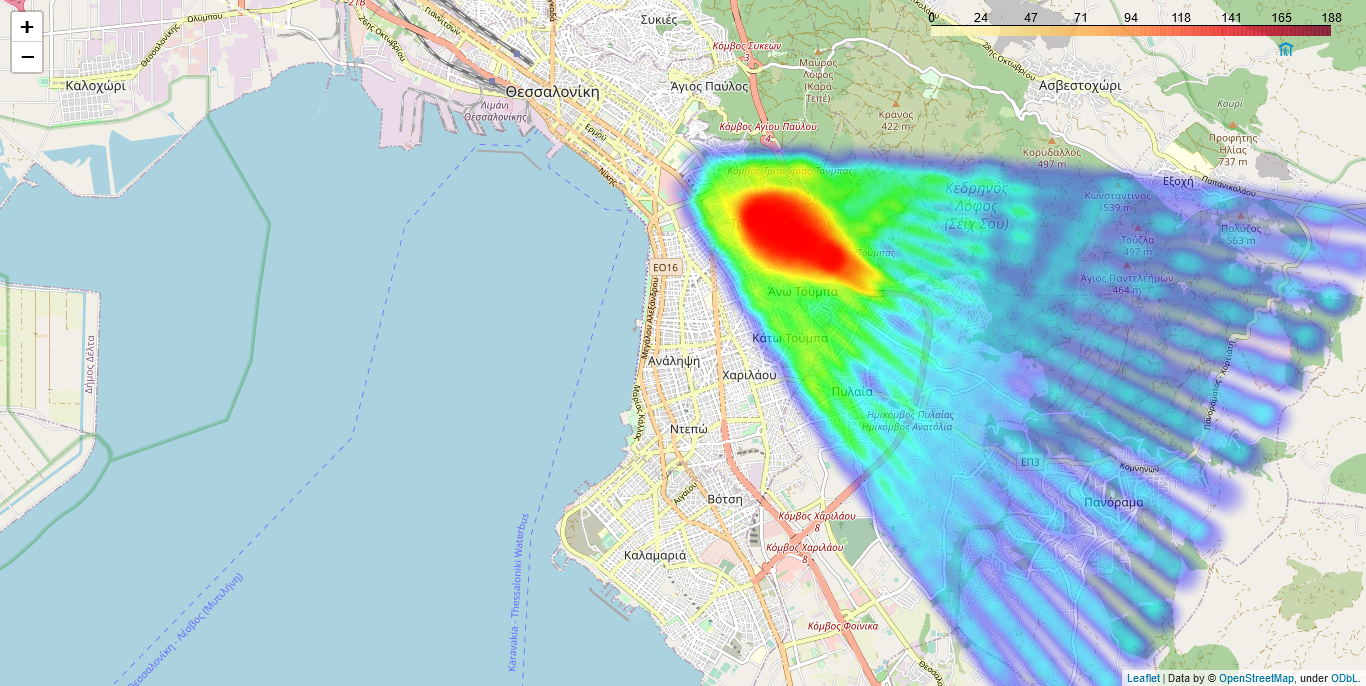

In [37]:
### in order to save the image of the heatmap produced geckodriver must be added in python path ###
### geckodriver is avilable in: https://github.com/mozilla/geckodriver/releases ###

### however it is better to take the image from Jupyter Notebook, in order to manipulate the heatmap accordingly ####

# Saving the heatmap in drive

img_data = final_map._to_png(5)
img = PIL.Image.open(io.BytesIO(img_data))
img.save('C:/Users/User/Downloads/final_map.png')
display(PIL.Image.open('C:/Users/User/Downloads/final_map.png'))

In [2]:
# maps for all buildings scenario 2

hmap = folium.Map(location=[40.607421, 22.957578], zoom_start=13)

path = 'D:/Ακαδημαϊκά/Papers/International Journal of Environment and Pollution/Αποτελέσματα/scenario_2.xlsx'

for_map = pd.read_excel(path)


print('Καύσιμο προς επιλογή:\nΦυσικό αέριο = 1\nΠετρέλαιο = 2')
fuel = int(input("Επιλογή καυσίμου (1-2): "))

if fuel == 1:
    fuel = str('fa')
else:
    fuel = str('petr')

print('Ρύποι προς επιλογή:\nCO2 = 1\nCO = 2\nNOx = 3\nVOC = 4\nSOx = 5\nPM = 6')
rypos = int(input("Επιλογή ρύπου (1-6): "))


if rypos == 1:
    rypos = str('CO2_')
elif rypos == 2:
    rypos = str('CO_')
elif rypos == 3:
    rypos = str('NOx_')
elif rypos == 4:
    rypos = str('VOC_')
elif rypos == 5:
    rypos = str('SOx_')
elif rypos == 6:
    rypos = str('PM_')
else:
    rypos = str('error')

column = str(rypos + fuel)

print(column)

max_amount = float(for_map['NOx_petr'].max())
print(max_amount)

hm_wide = HeatMap( list(zip(for_map.Latitude.values, for_map.Longtitude.values, for_map[column].values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=10,
                   max_zoom=1,
                 )


steps=20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, for_map[column].max()).to_step(steps)
gradient_map=defaultdict(dict)

hmap.add_child(hm_wide)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
colormap.add_to(hmap)

hmap.add_child(hm_wide)

Καύσιμο προς επιλογή:
Φυσικό αέριο = 1
Πετρέλαιο = 2
Επιλογή καυσίμου (1-2): 2
Ρύποι προς επιλογή:
CO2 = 1
CO = 2
NOx = 3
VOC = 4
SOx = 5
PM = 6
Επιλογή ρύπου (1-6): 1
CO2_petr
47.92998525148587


In [3]:
# points of maxes in map, scenario_2

hmap = folium.Map(location=[40.607421, 22.957578], zoom_start=13)
path = 'D:/Ακαδημαϊκά/Papers/International Journal of Environment and Pollution/Αποτελέσματα/scenario_2.xlsx'

for_map = pd.read_excel(path)

df_max = pd.DataFrame()
df_ktirio = pd.DataFrame()

for ktirio in range(1,10):
    df_ktirio = for_map[(for_map['ktirio'] == ktirio)]
    df_ktirio = df_ktirio[df_ktirio.NOx_fa == df_ktirio.NOx_fa.max()]
    df_max = df_max.append(df_ktirio)
    
df_max = df_max.drop_duplicates('ktirio')
locations = df_max[['Latitude', 'Longtitude']]
locationlist = locations.values.tolist()

hmap = folium.Map(location=[40.607421, 22.957578], zoom_start=13)

for point in range(0, 9):
    folium.Marker(locationlist[point]).add_to(hmap)
    
hmap

In [5]:
# Display a list of the coordinates of the max values resulting from each building under analysis

locationlist

[[40.622618, 22.974025],
 [40.621274, 22.974437],
 [40.622656, 22.970162],
 [40.624807, 22.967378],
 [40.62386, 22.970168],
 [40.625285, 22.966897],
 [40.624809, 22.965884],
 [40.622339, 22.973853],
 [40.618176, 22.977545]]

Επιλογή κτιρίου:
Κτίριο Διοίκησης = 1
Αρχιτεκτονική = 2
Κτίριο Δ = 3
Πύργος Παιδαγωγικού = 4
Θεολογική = 5
Υδραυλική = 6
Κτίριο Ε13 = 7
Γυμναστήριο = 8
Λέσχη = 9: 1
Ρύποι προς επιλογή:
CO2 = 1
CO = 2
NOx = 3
VOC = 4
SOx = 5
PM = 6
Επιλογή ρύπου (1-6): 1


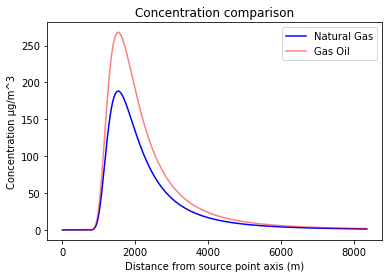

In [6]:
# plot for concentration - distance from point source, for each building - scenario 2

path = 'D:/Ακαδημαϊκά/Papers/International Journal of Environment and Pollution/Αποτελέσματα/scenario_2.xlsx'
for_map = pd.read_excel(path)

df_ktirio = pd.DataFrame()
ktirio = int((input('Επιλογή κτιρίου:\nΚτίριο Διοίκησης = 1\nΑρχιτεκτονική = 2\nΚτίριο Δ = 3\nΠύργος Παιδαγωγικού = 4\nΘεολογική = 5\nΥδραυλική = 6\nΚτίριο Ε13 = 7\nΓυμναστήριο = 8\nΛέσχη = 9: ')))

for_map = for_map[(for_map['ktirio'] == ktirio)]
df_ktirio = for_map[(for_map['Distance_y(m)'] == 0)]
df_ktirio = df_ktirio.drop_duplicates('Distance_x (m)')

print('Ρύποι προς επιλογή:\nCO2 = 1\nCO = 2\nNOx = 3\nVOC = 4\nSOx = 5\nPM = 6')
rypos = int(input("Επιλογή ρύπου (1-6): "))

if rypos == 1:
    rypos = str('CO2_')
elif rypos == 2:
    rypos = str('CO_')
elif rypos == 3:
    rypos = str('NOx_')
elif rypos == 4:
    rypos = str('VOC_')
elif rypos == 5:
    rypos = str('SOx_')
elif rypos == 6:
    rypos = str('PM_')
else:
    rypos = str('error')

column_fa = str(rypos + 'fa')
column_petr = str(rypos + 'petr')

line_C_fa = []
line_C_petr = []
line_dist = []
line_C_fa = df_ktirio[column_fa].tolist()
line_C_petr = df_ktirio[column_petr].tolist() 
line_dist = df_ktirio['Distance_x (m)'].tolist()

plt.plot(line_dist, line_C_fa, color='b')
plt.plot(line_dist, line_C_petr, color='r', alpha=0.5)

plt.xlabel('Distance from source point axis (m)')
plt.ylabel('Concentration μg/m^3')
plt.title("Concentration comparison")
plt.legend(["Natural Gas","Gas Oil"])
plt.show()

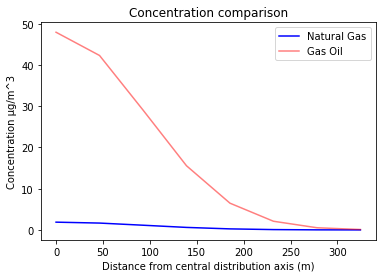

In [5]:
# ktirio ydraylikis sto shmeio megisths sygkentrwshs metavoli C - apostasi kentrikou axona

line_distance_y = [0,46.35603347,92.71206694,139.0681004,185.4241339,231.7801674,278.1362008,324.4922343]
line_C_fa = [1.885061135,1.663560612,1.143347374,0.611989748,0.255115283,0.082823806,0.020941138,0.004123554]
line_C_petr = [47.92998525,42.29806353,29.07100557,15.56058797,6.48661813,2.105896581,0.53245404,0.104846417]
plt.plot(line_distance_y, line_C_fa, color='b')
plt.plot(line_distance_y, line_C_petr, color='r', alpha=0.5)
plt.xlabel('Distance from central distribution axis (m)')
plt.ylabel('Concentration μg/m^3')
plt.title("Concentration comparison")
plt.legend(["Natural Gas","Gas Oil"])
plt.show()